# **Credit Card Fraud Detection**


The dataset includes information about transactions made by credit cards in September 2013 by European cardholders. We will use the trained model to assess if a credit card transaction is legitimate or not.


Our goal is to build a model that predicts if a credit card transaction is fraudulent or not. We modeled model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).

You have access to transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. Thus, typically you have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).



<div id="import_libraries">
    <h2>Import Libraries</h2>
</div>


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight

from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from sklearn.metrics import jaccard_score, f1_score, log_loss, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

<div id="dataset_analysis">
    <h2>Dataset Analysis</h2>
</div>


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
path = "/content/drive/MyDrive/Colab Notebooks/Credit Card Fraud Detection/creditcard.csv"
df = pd.read_csv(path)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
df.shape

(284807, 31)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In practice, a financial institution may have access to a much larger dataset of transactions.

To simulate such a case, we will inflate the original one 10 times.


In [38]:
n_replicas = 10
transactions_df = pd.DataFrame(np.repeat(df.values, n_replicas, axis=0), columns=df.columns)

transactions_df.shape

(2848070, 31)

In [39]:
transactions_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. Our goal is to train a model that uses the other variables to predict the value of the Class variable.

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.


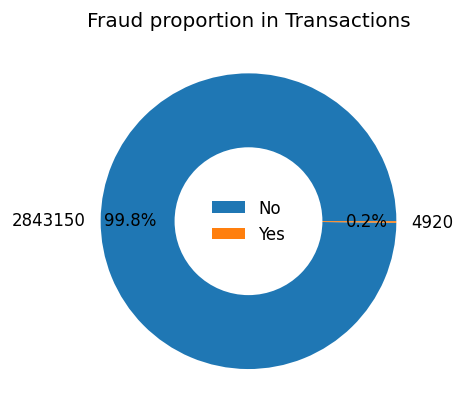

In [40]:
donut = transactions_df["Class"].value_counts().reset_index()

labels = ["No", "Yes"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["Class"],
        labels=donut["Class"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Fraud proportion in Transactions")
plt.legend(labels, loc="center", frameon=False)
plt.show()

In [41]:
fraud = len(transactions_df[transactions_df['Class'] == 1])
valid = len(transactions_df[transactions_df['Class'] == 0])

print(f"Number of Fraud case : {fraud}")
print(f"Number Valid case : {valid}")

Number of Fraud case : 4920
Number Valid case : 2843150


As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). Thus, you need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.

The credit card transactions have different amounts.
We are interested to see the range of these amounts an to display the 90th percentile of amount values

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0



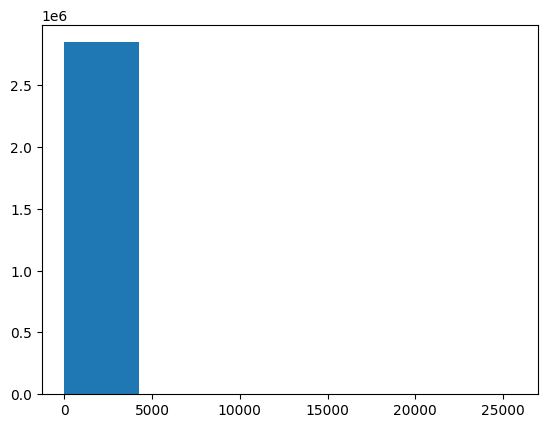

In [42]:
print("Minimum amount value is ", np.min(transactions_df.Amount.values))
print("Maximum amount value is ", np.max(transactions_df.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(transactions_df.Amount.values, 90))
print()
plt.hist(transactions_df.Amount.values, 6, histtype='bar')
plt.show()

In [43]:
transactions_df.corr()['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

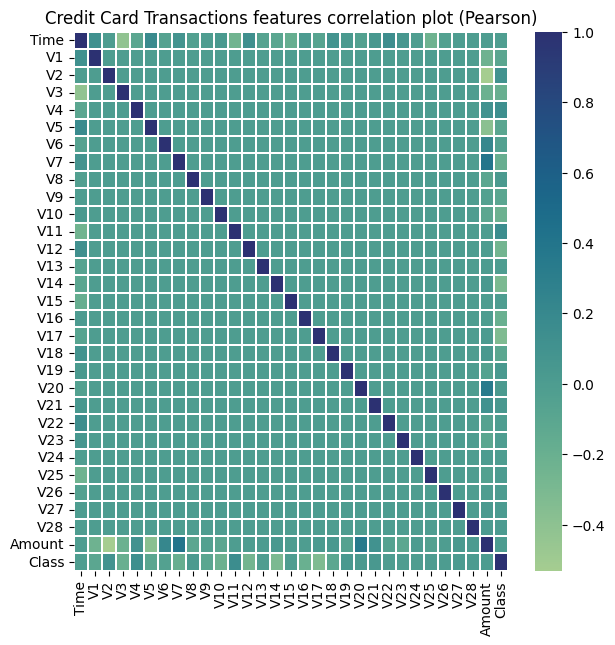

In [44]:
plt.figure(figsize = (7,7))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = transactions_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="crest")
plt.show()

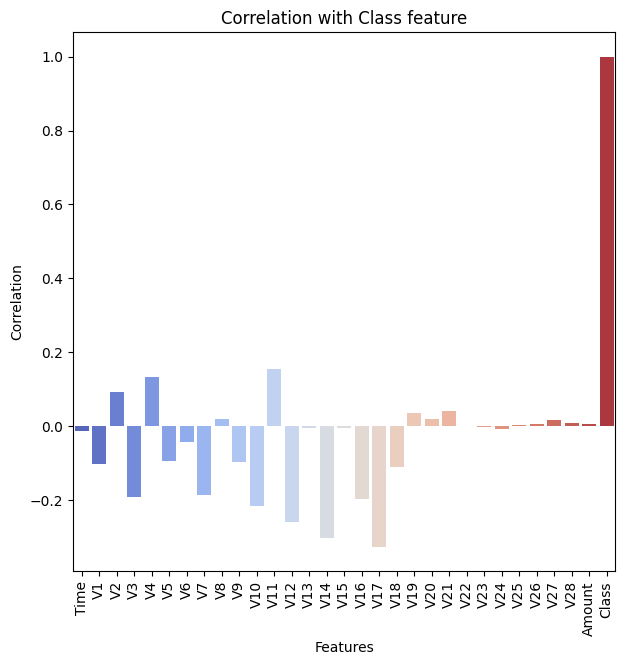

In [45]:
data = transactions_df.corr()

plt.figure(figsize=(7, 7))
sns.barplot(x=data.index, y=data['Class'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation with Class feature')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

<div id="dataset_preprocessing">
    <h2>Dataset Preprocessing</h2>
</div>


Data preprocessing such as scaling/normalization is typically useful for
linear models to accelerate the training convergence. For this analysis, we exclude the Time variable from the dataset

In [46]:
transactions_df.iloc[:, 1:30] = StandardScaler().fit_transform(transactions_df.iloc[:, 1:30])
data_matrix = transactions_df.values

X = data_matrix[:, 1:30]

y = data_matrix[:, 30]
X = normalize(X, norm="l1")

print('X.shape =', X.shape, 'y.shape =', y.shape)

X.shape = (2848070, 29) y.shape = (2848070,)


<div id="dataset_split">
    <h2>Dataset Train/Test Split</h2>
</div>


Now that the dataset is ready for building the classification models, we need to first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('X_train.shape =', X_train.shape, '\tY_train.shape =', y_train.shape)
print('X_test.shape =', X_test.shape, '\tY_test.shape =', y_test.shape)

X_train.shape = (1993649, 29) 	Y_train.shape = (1993649,)
X_test.shape = (854421, 29) 	Y_test.shape = (854421,)


## Decision Tree


In [48]:
w_train = compute_sample_weight('balanced', y_train)
Tree = DecisionTreeClassifier(max_depth=4, random_state=35)
Tree.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [49]:
predictions = Tree.predict(X_test)

In [50]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions, average="weighted")
Tree_F1_Score = f1_score(y_test, predictions, average="weighted")
Tree_Roc_Auc = roc_auc_score(y_test, predictions)

print(f"Accuracy score : {Tree_Accuracy_Score:.2f}")
print(f"Jaccard index score : {Tree_JaccardIndex:.2f}")
print(f"F1-score : {Tree_F1_Score:.2f}")
print(f"ROC-AUC score : {Tree_Roc_Auc:.2f}")

Accuracy score : 0.97
Jaccard index score : 0.96
F1-score : 0.98
ROC-AUC score : 0.94


## SVM


In [51]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [52]:
predictions = svm.predict(X_test)

In [53]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions, average="weighted")
SVM_F1_Score = f1_score(y_test, predictions, average="weighted")
SVM_Roc_Auc = roc_auc_score(y_test, predictions)

print(f"Accuracy score : {SVM_Accuracy_Score:.2f}")
print(f"Jaccard index score : {SVM_JaccardIndex:.2f}")
print(f"F1-score : {SVM_F1_Score:.2f}")
print(f"ROC-AUC score : {SVM_Roc_Auc:.2f}")

Accuracy score : 0.94
Jaccard index score : 0.94
F1-score : 0.97
ROC-AUC score : 0.94


## Report

In [54]:
Report = {
    'Model': ['Support Vector Machine', 'Decision Tree'],
    'Accuracy': [SVM_Accuracy_Score, Tree_Accuracy_Score],
    'Jaccard Index': [SVM_JaccardIndex, Tree_JaccardIndex],
    'F1-Score': [SVM_F1_Score, Tree_F1_Score],
    'ROC-AUC score': [SVM_Roc_Auc, Tree_Roc_Auc]
}

df_report = pd.DataFrame(Report)
df_report

,Model,Accuracy,Jaccard Index,F1-Score,ROC-AUC score
0,Support Vector Machine,0.944530,0.942857,0.969843,0.939753
1,Decision Tree,0.965743,0.964097,0.980993,0.938204
